In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler

sns.set_theme()

# Gradient Descent

Suppose we want to find the global minimum of a function. In this case, $$ f(w) = w^4 - 4w^3 - 3w^2 + 2w + 1 $$
To find the minimum, we can use a method called Gradient Descent. Gradient Descent is an iterative optimization algorithm used to find the minimum value of a function. The core idea is to take repeated steps in the opposite direction of the gradient (or approximate gradient) of the function at the current point because this is the direction of steepest descent.

Let's take a look at our function on a graph.

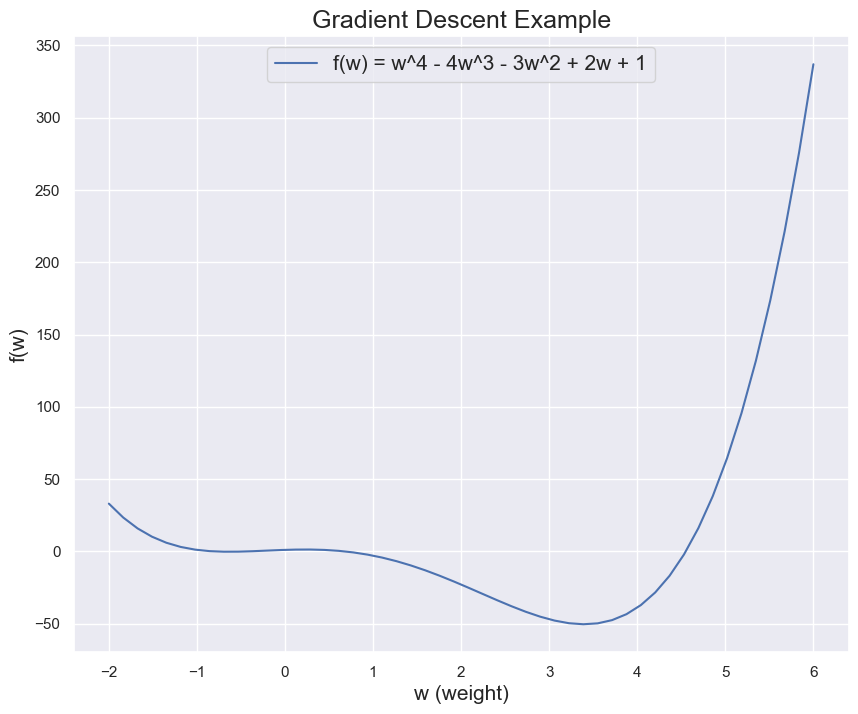

In [2]:
def f(w):
    return w**4 - 4 * (w**3) - 3 * (w**2) + 2 * w + 1

domain = np.linspace(-2, 6, 50)

plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(w) = w^4 - 4w^3 - 3w^2 + 2w + 1")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("Gradient Descent Example", fontsize = 18)
plt.show()

We can visibly see a minimum at roughly 3.5, but if we couldn't see, how would we get that value?

## Applying Gradient Descent to a Quartic Function
### Step 1: Derivative Calculation

The first derivative of the quartic function above, which is used to find the gradient needed for the descent steps, is:
$$
f'(w) = 4w^3 - 12w^2 - 6w + 2
$$

This derivative helps in determining the direction to adjust w to minimize f(w).

## Step 2: Initialization

- Choose an initial guess w_0: This is the starting point for the iterations. The choice can significantly influence the convergence behavior. For our example, we will set w_0 = 5.0

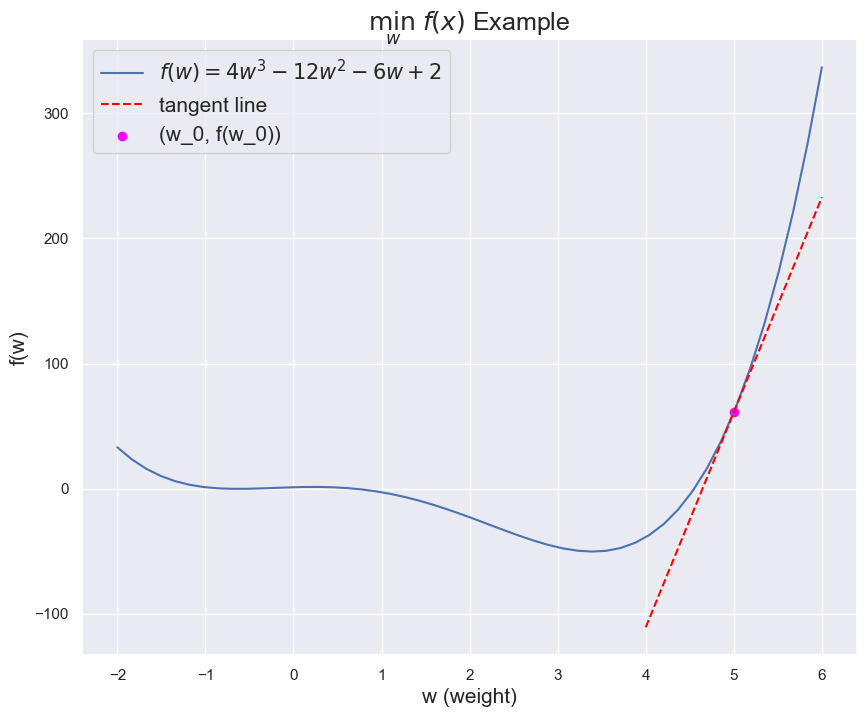

In [3]:
def df(w):
    return 4*(w**3) - 12*(w**2) - 6*(w) + 2

w_0 = 5.0

def tangent_line(w_i, function, derivative, i = 0, color = "magenta", show = True):
    def line(w):
        return derivative(w_i)*(w - w_i) + function(w_i)

    wrange = np.linspace(w_i - 1, w_i + 1, 10)
    if show:
        plt.plot(wrange,
            line(wrange), 
            '--', 
            linewidth = 1.5, 
            color = "red", 
            label = "tangent line")
    plt.scatter([w_i], [function(w_i)], color = color, label = f"(w_{i}, f(w_{i}))")

plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = 4w^3 -12w^2 - 6w + 2$")
tangent_line(w_0, f, df)

plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("$\min_w$ $f(x)$ Example", fontsize = 18)
plt.show()

- Set the learning rate α: This controls the size of each step. The learning rate might need adjustment during experimentation to find a balance between convergence speed and stability. For our example, we will set α = 0.

- Define convergence criteria: Common criteria include a small change between iterations or the gradient nearing zero.

## Step 3: Iterative Update
Gradient evaluation: Calculate $f'(w)$ at the current w.
Update rule: Adjust w according to
$$
w \leftarrow w - \alpha f'(w)
$$

This step moves w in the direction that reduces f(w).

Repeat until convergence criteria are met.

w_0 = 5.0
w_1 = 1.56


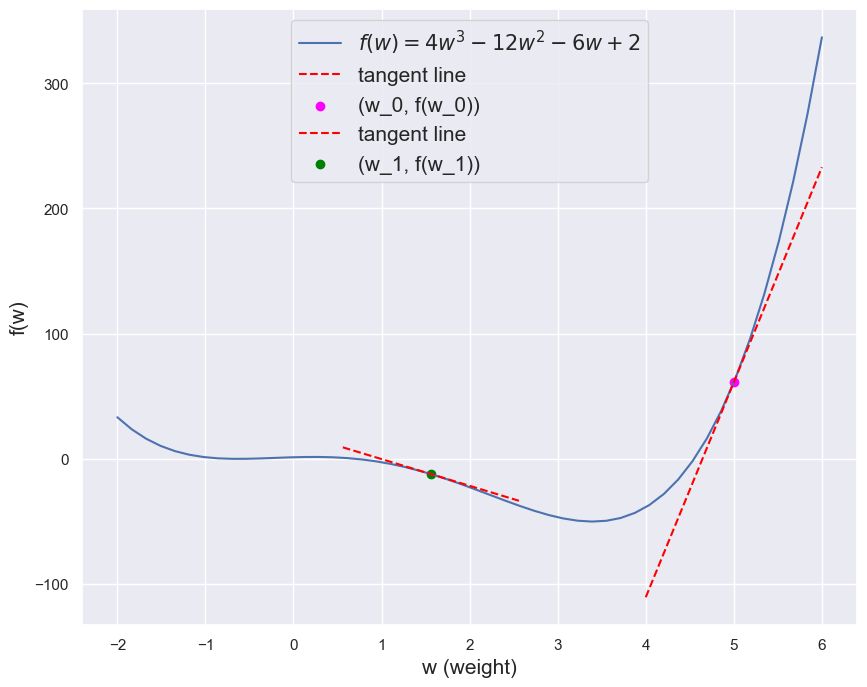

In [4]:
w_0 = 5.0

alpha = .02

w_1 = w_0 - alpha*df(w_0)

print(f"{w_0 = }")
print(f"{w_1 = }")

plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = 4w^3 -12w^2 - 6w + 2$")

tangent_line(w_0, f, df, show = True)
tangent_line(w_1, f, df, i = 1, color = "green")

plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.show()

As we can see, with one iteration the gradient descent picked a new point w_1 = 1.56. Let's see what happens when we run it again.

w_0 = 5.0
w_1 = 1.56
w_2 = 1.98755072


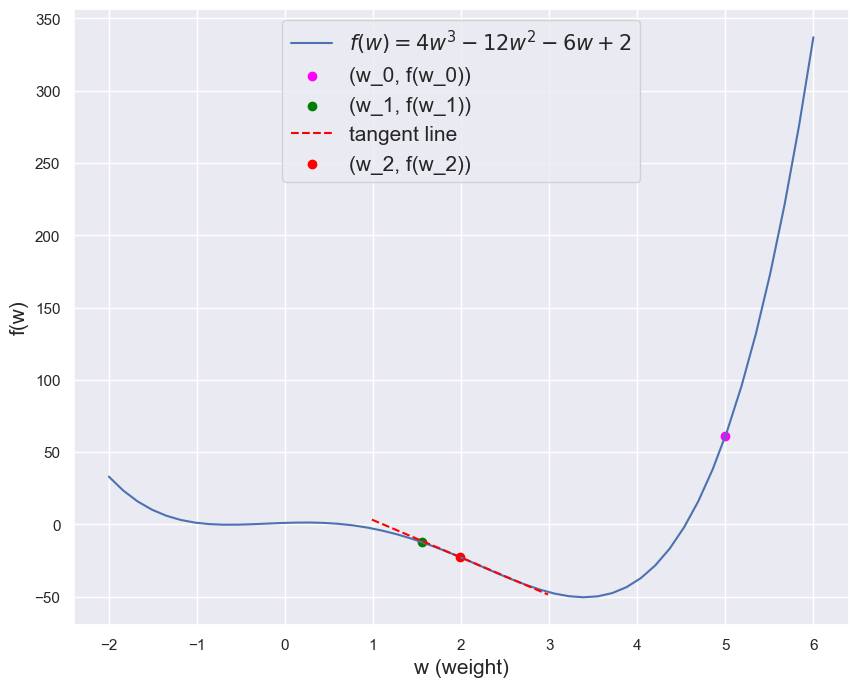

In [5]:
w_2 = w_1 - alpha*df(w_1)

print(f"{w_0 = }")
print(f"{w_1 = }")
print(f"{w_2 = }")

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = 4w^3 -12w^2 - 6w + 2$")

# Visualize the tangent lines
tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1, color = "green", show = False)
tangent_line(w_2, f, df, i = 2, color = "red")

# Plot labels
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.show()

On the second iteration, w_2 = 1.987. We are slowly getting closer to the global minimum, which is roughly 3.5. Let's see what happens when we let this run indefinitely until it finds the minimum.

w_0 = 5.0 | df(w_0) = 172.0
w_1 = 1.56 | df(w_1) = -21.377536
w_2 = 1.99 | df(w_2) = -25.92345222291513
w_3 = 2.51 | df(w_3) = -25.44516897115448
w_4 = 3.01 | df(w_4) = -15.546947584649033
w_5 = 3.33 | df(w_5) = -3.5372624975802758
w_6 = 3.4 | df(w_6) = -0.077101161905059
w_7 = 3.4 | df(w_7) = 0.0014943411433208098
w_8 = 3.4 | df(w_8) = -3.0262938569336484e-05



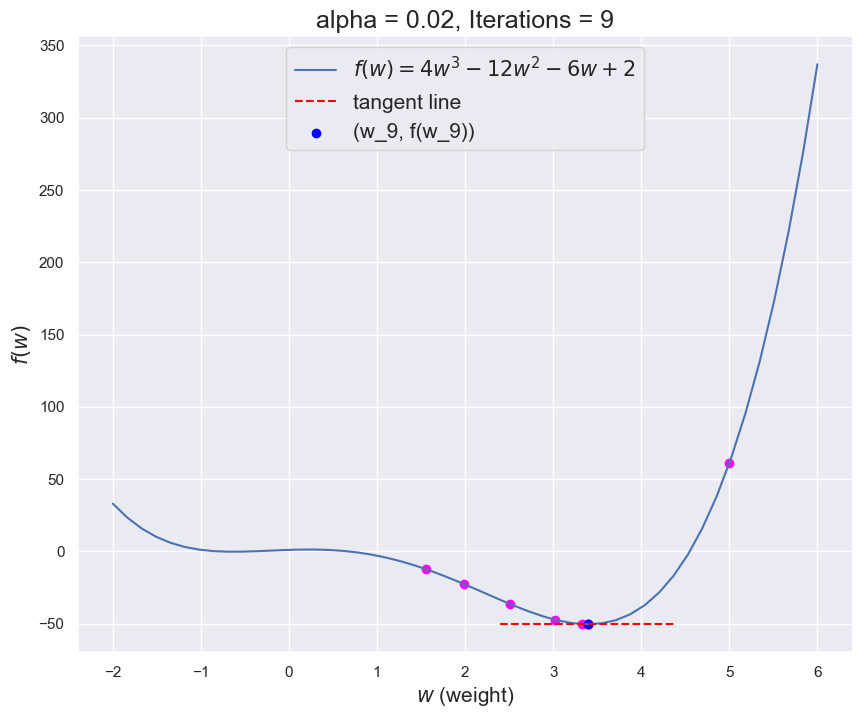

In [6]:
def derivative_descent(derivative, alpha = 0.02, w_0 = 5.0, max_iter = 1_000):
    W = [w_0]
    i = 0
    while abs(derivative(W[-1])) > 0.001 and i < max_iter:
        w_new = W[-1] - alpha*df(W[-1])
        W.append(w_new)
        i += 1
    W = np.array(W)

    return W

W = derivative_descent(df)

for i, w in enumerate(W):
    print(f"w_{i} = {np.round(w, decimals = 2)} | df(w_{i}) = {df(w)}")
print("")


# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = 4w^3 -12w^2 - 6w + 2$")
plt.scatter(W, f(W), color = "magenta")
tangent_line(W[-1], f, df, i = len(W), color = "blue")
plt.xlabel("$w$ (weight)", fontsize = 15)
plt.ylabel("$f(w)$", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title(f"alpha = {alpha}, Iterations = {len(W)}", fontsize = 18)
plt.show()

Success! As we can see, we found the global minimum, with w = 3.4. Let's expirement the learning rate with different alphas.

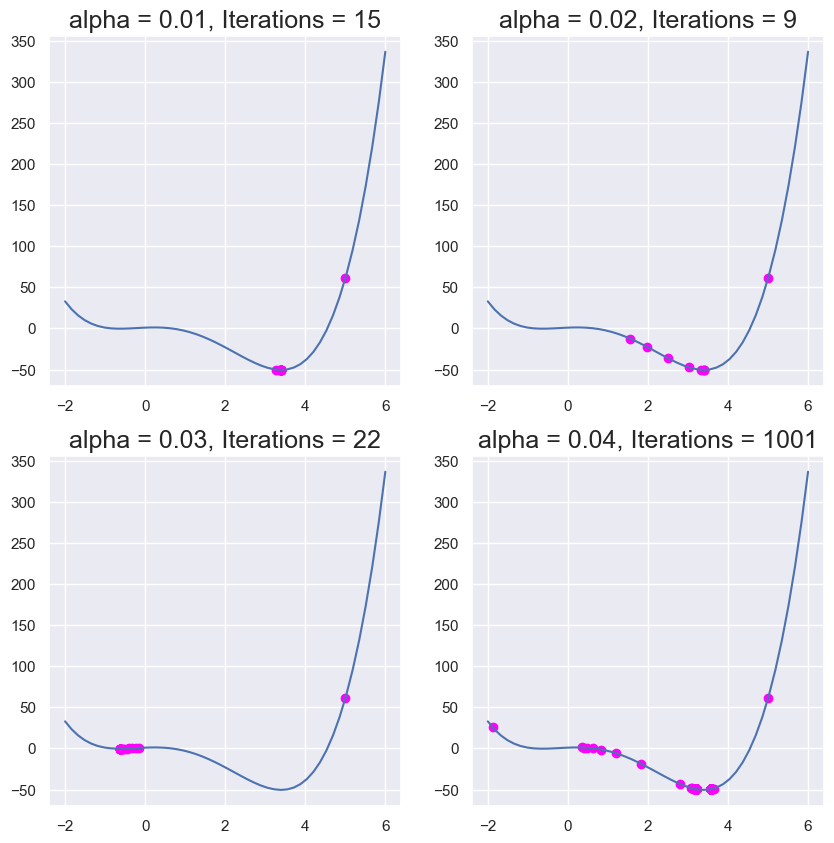

In [7]:
# Possible choices of learning rate 
alphas = [0.01, 0.02, 0.03, 0.04]

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    W = derivative_descent(df, alpha = alpha)
    ax.plot(domain, f(domain))
    ax.scatter(W, f(W), color = "magenta")
    ax.set_title(f"alpha = {alpha}, Iterations = {len(W)}", fontsize = 18)

By the looks of it, alpha = 0.02 (our original), was the most efficient. Also, at alpha  = 0.03, we found a local minimum instead of a global minimum. The is a potential flaw of the gradient descent algorithm when dealing with functions of powers > 2.

We can also do this process on multivariate functions. For example, $$ f(w_0, w_1) = 4w_0^2 + 4w_0 + 2w_1^2 + 4w_1 + 1 $$


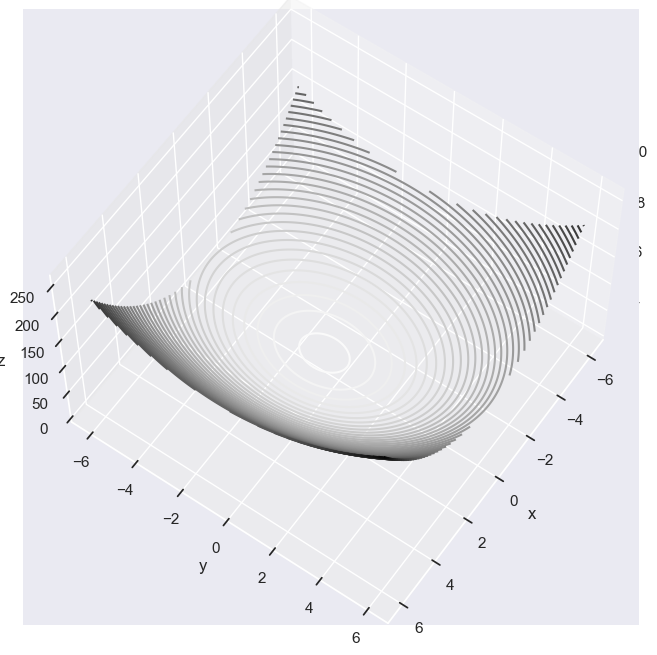

In [8]:
def f(w_0, w_1):
    return 4*(w_0 ** 2) + 4*(w_0) + 2*(w_1 ** 2) + 4*(w_1) + 1

x = np.linspace(-6, 6, 300)
y = np.linspace(-6, 6, 300)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax.view_init(60, 35)
plt.show()

Now, let's repeat the same process as we did above, but this time for two variables.

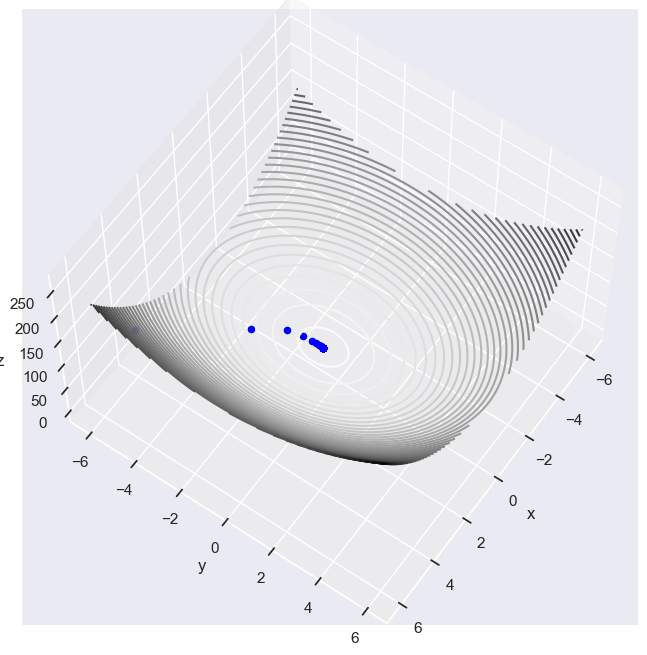

In [9]:
def df(w):
    grad = [8*w[0] + 4, 4*w[1] + 4]
    return np.array(grad)

def gradient_descent(derivative, W, alpha = 0.8, max_iter = 1_000):
    i = 0
    W_hist = [W]
    while i < max_iter:
        W = W - alpha*df(W)
        i += 1
        W_hist.append(W)

    return W_hist

W = gradient_descent(df, np.array([5.0, -5.0]), alpha = 0.1, max_iter=500)

x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)


fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
for i in range(len(W)):
    ax.scatter3D([W[i][0]], 
                 [W[i][1]], 
                 [f(W[i][0], W[i][1])], color = "blue")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(60, 35)
plt.show()

Great, now let's see how we can use Gradient Descent for Linear Regression Neuron!